In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint


In [2]:
df=sns.load_dataset("diamonds")

In [3]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [4]:
le=LabelEncoder()
category_cols=[ 'color', 'clarity',]


for col in category_cols:
  df[col]=le.fit_transform(df[col])

In [5]:
scaling_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
sc=StandardScaler()

for col in scaling_cols:
  df[[col]]=sc.fit_transform(df[[col]])

df.head(10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,-1.198168,Ideal,1,3,-0.174092,-1.099672,-0.904095,-1.587837,-1.536196,-1.571129
1,-1.240361,Premium,1,2,-1.360738,1.585529,-0.904095,-1.641325,-1.658774,-1.741175
2,-1.198168,Good,1,4,-3.385019,3.375663,-0.903844,-1.498691,-1.457395,-1.741175
3,-1.071587,Premium,5,5,0.454133,0.242928,-0.902090,-1.364971,-1.317305,-1.287720
4,-1.029394,Good,6,3,1.082358,0.242928,-0.901839,-1.240167,-1.212238,-1.117674
5,-1.177071,Very Good,6,7,0.733344,-0.204605,-0.901589,-1.596752,-1.553707,-1.500277
6,-1.177071,Very Good,5,6,0.384331,-0.204605,-0.901589,-1.587837,-1.536196,-1.514447
7,-1.134878,Very Good,4,2,0.105120,-1.099672,-0.901338,-1.480862,-1.422373,-1.429424
8,-1.219265,Fair,1,5,2.338808,1.585529,-0.901338,-1.659155,-1.711308,-1.486106
9,-1.198168,Very Good,4,4,-1.639950,1.585529,-0.901087,-1.543264,-1.474906,-1.627811


In [6]:
df.describe()

,carat,color,clarity,depth,table,price,x,y,z
count,5.394000e+04,53940.000000,53940.000000,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04
mean,2.444878e-16,2.594197,3.835150,-3.996902e-15,9.695207e-17,-9.273676e-17,2.782103e-16,-8.430615e-17,-2.002271e-16
std,1.000009e+00,1.701105,1.724591,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.261458e+00,0.000000,0.000000,-1.308760e+01,-6.470073e+00,-9.040952e-01,-5.109120e+00,-5.020931e+00,-5.014556e+00
25%,-8.395232e-01,1.000000,2.000000,-5.231053e-01,-6.521385e-01,-7.476808e-01,-9.103248e-01,-8.882800e-01,-8.909461e-01
50%,-2.066210e-01,3.000000,4.000000,3.531678e-02,-2.046051e-01,-3.839672e-01,-2.777553e-02,-2.147398e-02,-1.237618e-02
75%,5.106683e-01,4.000000,5.000000,5.239361e-01,6.904618e-01,3.487866e-01,7.210542e-01,7.052421e-01,7.103184e-01
max,8.886075e+00,6.000000,7.000000,1.204139e+01,1.680167e+01,3.732438e+00,4.465203e+00,4.654965e+01,4.004758e+01


In [7]:
x=df.drop('cut',axis=1)
y=df['cut']

In [8]:
le=LabelEncoder()

y_en=le.fit_transform(y)

y_en


array([2, 3, 1, ..., 4, 3, 2])

In [9]:
y

,cut
0,Ideal
1,Premium
2,Good
3,Premium
4,Good
...,...
53935,Ideal
53936,Good
53937,Very Good
53938,Premium


In [10]:
y_cat=to_categorical(y_en)

y_cat

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])

In [11]:
y_cat[0]

array([0., 0., 1., 0., 0.])

In [12]:
y.unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [13]:
X_train,X_test,y_train,y_test=train_test_split(x,y_cat,test_size=0.2,random_state=42)

In [14]:
y_cat.shape

(53940, 5)

In [15]:
Scaler=StandardScaler()

X_train_s=Scaler.fit_transform(X_train)
X_test_s=Scaler.transform(X_test)

In [16]:
model=Sequential([
    Dense(256,activation='relu',),
     Dropout(0.2),
    Dense(398,activation='relu'),
    Dropout(0.2),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(5,activation='softmax')
])

In [17]:
from keras.optimizers.schedules import ExponentialDecay
lr_schedule=ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=500,
    decay_rate=0.9,
)

In [18]:
from keras.optimizers import Adam
adam_new=Adam(learning_rate=lr_schedule)

In [19]:
early_Stopping=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [20]:
checkpoint=ModelCheckpoint(filepath='/content/Myfiles/model_cp.keras',monitor='val_loss',verbose=1,save_best_only=True)

In [21]:
model.compile(optimizer=adam_new,loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
hist=model.fit(X_train_s,y_train,epochs=100,batch_size=30,validation_split=0.2,verbose=1,callbacks=[early_Stopping,checkpoint])

Epoch 1/100
1151/1151 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6240 - loss: 0.9617
Epoch 1: val_loss improved from inf to 0.75404, saving model to /content/Myfiles/model_cp.keras
1151/1151 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6240 - loss: 0.9616 - val_accuracy: 0.7072 - val_loss: 0.7540
Epoch 2/100
1147/1151 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7020 - loss: 0.7612
Epoch 2: val_loss improved from 0.75404 to 0.72655, saving model to /content/Myfiles/model_cp.keras
1151/1151 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7020 - loss: 0.7612 - val_accuracy: 0.7136 - val_loss: 0.7266
Epoch 3/100
1147/1151 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7100 - loss: 0.7392
Epoch 3: val_loss improved from 0.72655 to 0.69773, saving model to /content/Myfiles/model_cp.keras
1151/1151 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7100 - loss: 0.7392 - val_accuracy: 0.7311 - val_loss: 0.6977
Epoch 4/100
1144/1151 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7252 - los

In [23]:
loss,accuracy=model.evaluate(X_test_s,y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7857 - loss: 0.5407
Loss: 0.5367177128791809
Accuracy: 0.7885613441467285


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 398)            │       102,286 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 398)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       102,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 624,826 (2.38 MB)

 Trainable params: 208,275 (813.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 416,551 (1.59 MB)

In [25]:
X_test_s[:10].shape

(10, 9)

In [26]:
preds=model.predict(X_test_s[:10])
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


array([[1.64827998e-05, 1.45127845e-03, 5.14100373e-01, 1.25578581e-03,
        4.83176023e-01],
       [2.16485537e-03, 2.78823311e-03, 7.01601148e-01, 1.55680075e-01,
        1.37765720e-01],
       [6.12224467e-05, 3.59570950e-05, 9.63987768e-01, 1.76215935e-02,
        1.82933901e-02],
       [3.64365551e-04, 9.22781546e-05, 8.97463143e-01, 7.26034790e-02,
        2.94768177e-02],
       [1.71364390e-03, 1.88173319e-04, 5.95762551e-01, 3.92965525e-01,
        9.37005971e-03],
       [8.23791385e-01, 1.76145107e-01, 1.49836796e-05, 6.30965502e-08,
        4.82886862e-05],
       [2.01560892e-04, 8.43834877e-03, 6.87313795e-01, 1.03134485e-02,
        2.93732882e-01],
       [3.53553223e-05, 2.71371595e-04, 9.40268457e-01, 5.65974414e-03,
        5.37651181e-02],
       [2.52514775e-03, 2.10034824e-03, 3.73759083e-02, 8.85204434e-01,
        7.27941319e-02],
       [2.48958648e-04, 1.92552693e-02, 6.27706945e-01, 1.32954801e-02,
        3.39493334e-01]], dtype=float32)

In [27]:
preds.shape

(10, 5)

In [28]:
preds.max(axis=1)

array([0.5141004 , 0.70160115, 0.96398777, 0.89746314, 0.59576255,
       0.8237914 , 0.6873138 , 0.94026846, 0.88520443, 0.62770694],
      dtype=float32)

In [29]:
pred_cls=np.argmax(preds,axis=1)
pred_cls

array([2, 2, 2, 2, 2, 0, 2, 2, 3, 2])

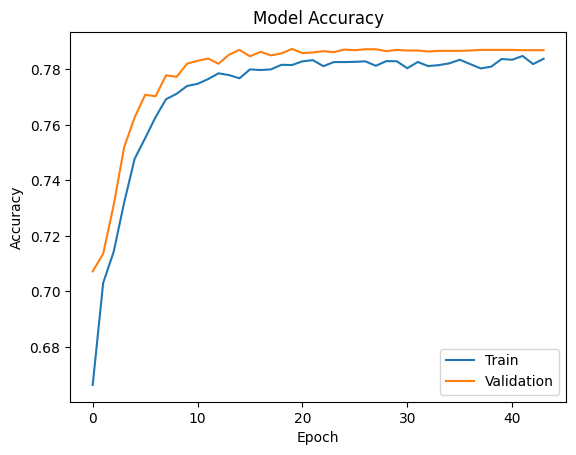

In [30]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

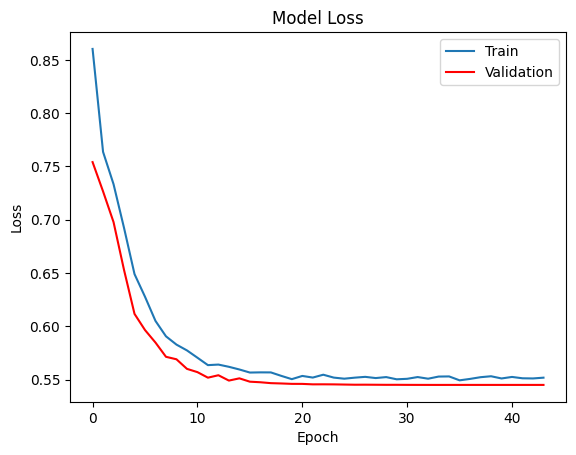

In [31]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'],color='red')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()